# Gender Prediction for Scenario 2

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing all datasets
df = pd.read_parquet("Final_data_k/scenario_2.parquet")
df.head()

,device_id,brand,model,gender,age
0,398514470209561000,Huawei,è£è€€ç•…çŽ©4X,M,68
1,5805880616488060000,others,è¶…çº§æ‰‹æœº1,M,39
2,-1889893391998300000,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,M,22
3,3422421754497040000,samsung,Galaxy Note 3,M,27
4,3221871111026990000,Huawei,è£è€€ç•…çŽ©4X,M,29


## Data Preparation

In [4]:
# creating a dict 
gender = {'M': 1,'F': 0}
  
# traversing through dataframe gender column and writing values where key matches
df.gender = [gender[item] for item in df.gender]

In [5]:
df.head()

,device_id,brand,model,gender,age
0,398514470209561000,Huawei,è£è€€ç•…çŽ©4X,1,68
1,5805880616488060000,others,è¶…çº§æ‰‹æœº1,1,39
2,-1889893391998300000,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,1,22
3,3422421754497040000,samsung,Galaxy Note 3,1,27
4,3221871111026990000,Huawei,è£è€€ç•…çŽ©4X,1,29


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51335 entries, 0 to 51334
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   device_id  51335 non-null  int64 
 1   brand      51335 non-null  object
 2   model      51335 non-null  object
 3   gender     51335 non-null  int64 
 4   age        51335 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.0+ MB


In [7]:
# converting type of columns to 'category'
df['brand'] = df['brand'].astype('category')
df['model'] = df['model'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51335 entries, 0 to 51334
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   device_id  51335 non-null  int64   
 1   brand      51335 non-null  category
 2   model      51335 non-null  category
 3   gender     51335 non-null  int64   
 4   age        51335 non-null  int64   
dtypes: category(2), int64(3)
memory usage: 1.3 MB


In [9]:
df.head()

,device_id,brand,model,gender,age
0,398514470209561000,Huawei,è£è€€ç•…çŽ©4X,1,68
1,5805880616488060000,others,è¶…çº§æ‰‹æœº1,1,39
2,-1889893391998300000,Huawei,è£è€€3Xç•…çŽ©ç‰ˆ,1,22
3,3422421754497040000,samsung,Galaxy Note 3,1,27
4,3221871111026990000,Huawei,è£è€€ç•…çŽ©4X,1,29


In [10]:
# generate binary values using get_dummies
df = pd.get_dummies(df, columns=["brand"], prefix=["brand"] )

In [11]:
df = pd.get_dummies(df, columns=["model"], prefix=["model"] )

In [12]:
df.head()

,device_id,gender,age,brand_Coolpad,brand_Gionee,brand_HTC,brand_Huawei,brand_Meizu,brand_OPPO,brand_Xiaomi,...,model_è£è€€ç•…çŽ©5X,model_è¶…çº§æ‰‹æœº1,model_è¶…çº§æ‰‹æœº1 Pro,model_é’æ˜¥ç‰ˆ,model_é­…è“,model_é­…è“2,model_é­…è“metal,model_éº¦èŠ’4,model_é»„é‡‘æ–—å£«A8,model_é”‹å°š
0,398514470209561000,1,68,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5805880616488060000,1,39,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-1889893391998300000,1,22,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3422421754497040000,1,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3221871111026990000,1,29,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split data

In [13]:
train_test_split=pd.read_csv("s3://telco.capstone.hari/train_test_split.csv")

In [14]:
train_split = train_test_split[train_test_split['train_test_flag'] == "train"]

In [15]:
train_split.head()

,device_id,gender,age,group,train_test_flag
0,-7548291590301750000,M,33,M32+,train
1,6943568600617760000,M,37,M32+,train
2,5441349705980020000,M,40,M32+,train
3,-5393876656119450000,M,33,M32+,train
4,4543988487649880000,M,53,M32+,train


In [16]:
train_devideId_values = train_split.device_id.values

In [17]:
test_split = train_test_split[train_test_split['train_test_flag'] == "test"]

In [18]:
test_split.head()

,device_id,gender,age,group,train_test_flag
17481,2948104315232910000,F,65,F32+,test
17482,8231243155939480000,F,47,F32+,test
17483,-3994292212856080000,F,31,F25-32,test
17484,7217910398487470000,M,29,M25-32,test
17485,8642523170587800000,F,31,F25-32,test


In [19]:
test_deviveID_values = test_split.device_id.values

In [20]:
train_data = df.loc[df['device_id'].isin(train_devideId_values)]

In [21]:
test_data = df.loc[df['device_id'].isin(test_deviveID_values)]

In [22]:
train_data.head()

,device_id,gender,age,brand_Coolpad,brand_Gionee,brand_HTC,brand_Huawei,brand_Meizu,brand_OPPO,brand_Xiaomi,...,model_è£è€€ç•…çŽ©5X,model_è¶…çº§æ‰‹æœº1,model_è¶…çº§æ‰‹æœº1 Pro,model_é’æ˜¥ç‰ˆ,model_é­…è“,model_é­…è“2,model_é­…è“metal,model_éº¦èŠ’4,model_é»„é‡‘æ–—å£«A8,model_é”‹å°š
0,398514470209561000,1,68,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5805880616488060000,1,39,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,-1889893391998300000,1,22,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3422421754497040000,1,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3221871111026990000,1,29,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_data.head()

,device_id,gender,age,brand_Coolpad,brand_Gionee,brand_HTC,brand_Huawei,brand_Meizu,brand_OPPO,brand_Xiaomi,...,model_è£è€€ç•…çŽ©5X,model_è¶…çº§æ‰‹æœº1,model_è¶…çº§æ‰‹æœº1 Pro,model_é’æ˜¥ç‰ˆ,model_é­…è“,model_é­…è“2,model_é­…è“metal,model_éº¦èŠ’4,model_é»„é‡‘æ–—å£«A8,model_é”‹å°š
12773,2602209329720390000,0,36,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12774,4999143280669700000,1,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12775,-1458857306549150000,0,33,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12776,-7217261791343240000,1,20,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
12777,-8003569692105950000,1,27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#get X_train, y_train from train_data
X_train = train_data.loc[:, ((train_data.columns != 'device_id') & (train_data.columns != 'gender') & (train_data.columns != 'age'))]
y_train = train_data.loc[:, (train_data.columns == 'gender')]

In [25]:
#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'gender') & (train_data.columns != 'age'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

In [26]:
X_train.head()

,brand_Coolpad,brand_Gionee,brand_HTC,brand_Huawei,brand_Meizu,brand_OPPO,brand_Xiaomi,brand_lenovo,brand_others,brand_samsung,...,model_è£è€€ç•…çŽ©5X,model_è¶…çº§æ‰‹æœº1,model_è¶…çº§æ‰‹æœº1 Pro,model_é’æ˜¥ç‰ˆ,model_é­…è“,model_é­…è“2,model_é­…è“metal,model_éº¦èŠ’4,model_é»„é‡‘æ–—å£«A8,model_é”‹å°š
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
y_train

,gender
0,1
1,1
2,1
3,1
4,1
...,...
50693,1
50694,1
50695,1
50696,1


In [28]:
train_data.gender.value_counts(normalize=True)

1    0.635839
0    0.364161
Name: gender, dtype: float64

64% train_data is male and 36% train_data is female.

### LogisticRegression model building using statsmodel

In [29]:
import statsmodels.api as sm

In [30]:
col = X_train.columns

In [31]:
col

Index(['brand_Coolpad', 'brand_Gionee', 'brand_HTC', 'brand_Huawei',
       'brand_Meizu', 'brand_OPPO', 'brand_Xiaomi', 'brand_lenovo',
       'brand_others', 'brand_samsung',
       ...
       'model_è£è€€ç•…çŽ©5X', 'model_è¶…çº§æ‰‹æœº1',
       'model_è¶…çº§æ‰‹æœº1 Pro', 'model_é’æ˜¥ç‰ˆ', 'model_é­…è“',
       'model_é­…è“2', 'model_é­…è“metal', 'model_éº¦èŠ’4',
       'model_é»„é‡‘æ–—å£«A8', 'model_é”‹å°š'],
      dtype='object', length=162)

In [32]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 gender   No. Observations:                41067
Model:                            GLM   Df Residuals:                    40906
Model Family:                Binomial   Df Model:                          160
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 16 Jan 2022   Deviance:                   1.7630e+06
Time:                        10:02:36   Pearson chi2:                 8.62e+19
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     7.175e+14   7.04e+05   1.02e+09      0.000    7.18e+14    7.18e+14
brand_Coolpad             -1.81e+15   2.13e+06  -8.49e+08      0.000   -1.81e+15   -1.81e+15
brand_Gionee              1.026e+15    2.7e+06   3.81e+08      0.000    1.03e+15    1.03e+15
brand_HTC                -1.702e+15   3.06e+06  -5.56e+08      0.000    -1.7e+15    -1.7e+15
brand_Huawei              1.539e+15   2.01e+06   7.67e+08      0.000    1.54e+15    1.54e+15
brand_Meizu               2.619e+15   8.52e+06   3.07e+08      0.000    2.62e+15    2.62e+15
brand_OPPO               -2.317e+15   2.52e+06  -9.19e+08      0.000   -2.32e+15   -2.32e+15
brand_Xiaomi              7.189e+14   6.05e+06   1.19e+08      0.000    7.19e+14    7.19e+14
brand_lenovo              2.217e+15   2.07e+06   1.07e+09      0.000    2.22e+15    2.22e+15
brand_others             -7.224e+14   1.61e+06  -4.48e+08      0.000   -7.22e+14   -7.22e+14
brand_samsung             -4.26e+14   1.91e+06  -2.23e+08      0.000   -4.26e+14   -4.26e+14
brand_vivo                -4.25e+14   2.31e+06  -1.84e+08      0.000   -4.25e+14   -4.25e+14
model_1107                1.792e+12   8.34e+06   2.15e+05      0.000    1.79e+12    1.79e+12
model_45rggt2             2.107e+15   4.89e+06   4.31e+08      0.000    2.11e+15    2.11e+15
model_8720L               6.673e+14   7.17e+06    9.3e+07      0.000    6.67e+14    6.67e+14
model_900tr2              1.058e+15   8.03e+06   1.32e+08      0.000    1.06e+15    1.06e+15
model_900tr2123           3.602e+15   1.09e+07    3.3e+08      0.000     3.6e+15     3.6e+15
model_A1                  1.295e+15   8.15e+06   1.59e+08      0.000     1.3e+15     1.3e+15
model_A31                 3.913e+15   6.79e+06   5.76e+08      0.000    3.91e+15    3.91e+15
model_A320t               2.529e+14   8.38e+06   3.02e+07      0.000    2.53e+14    2.53e+14
model_A33                 2.021e+14   9.93e+06   2.03e+07      0.000    2.02e+14    2.02e+14
model_A788t              -4.083e+15   7.52e+06  -5.43e+08      0.000   -4.08e+15   -4.08e+15
model_A850               -9.702e+14   8.33e+06  -1.17e+08      0.000    -9.7e+14    -9.7e+14
model_Ascend G7          -9.917e+14   8.69e+06  -1.14e+08      0.000   -9.92e+14   -9.92e+14
model_Ascend P6           -1.32e+15   5.22e+06  -2.53e+08      0.000   -1.32e+15   -1.32e+15
model_Ascend P7          -2.334e+15   4.48e+06  -5.21e+08      0.000   -2.33e+15   -2.33e+15
model_Ascend P8          -3.179e+14   6.34e+06  -5.01e+07      0.000   -3.18e+14   -3.18e+14
model_B199               -1.485e+15   1.01e+07  -1.47e+08      0.000   -1.49e+15   -1.49e+15
model_Desire 816          1.765e+15   6.71e+06   2.63e+08      0.000    1.77e+15    1.77e+15
model_F103                5.503e+14   9.46e+06   5.82e+07      0.000     5.5e+14     5.5e+14
model_F2      

In [33]:
#Recursive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False False False False  True False
  True  True False  True False False  True False  True  True False False
 False False  True  True  True  True False  True False  True False  True
 False False  True  True  True False  True  True  True False  True False
 False False False False False  True  True False  True  True  True False
  True False False False  True  True  True  True False  True  True False
  True  True  True  True  True False False False False False  True  True
 False False False  True  True False False  True  True  True False  True
 False False  True  True  True  True  True False False  True  True  True
 False False  True  True  True False  True False False False  True False
 False False  True  True  True  True  True False False False  True False
 False  True False  True  True False  True False  True False  True False
 False False  True False False False False  True False False  True  True
  True  True False False  True  True]
[73 67 36 11 

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('brand_Coolpad', False, 73),
 ('brand_Gionee', False, 67),
 ('brand_HTC', False, 36),
 ('brand_Huawei', False, 11),
 ('brand_Meizu', True, 1),
 ('brand_OPPO', True, 1),
 ('brand_Xiaomi', False, 40),
 ('brand_lenovo', False, 31),
 ('brand_others', False, 5),
 ('brand_samsung', False, 75),
 ('brand_vivo', True, 1),
 ('model_1107', False, 12),
 ('model_45rggt2', True, 1),
 ('model_8720L', True, 1),
 ('model_900tr2', False, 6),
 ('model_900tr2123', True, 1),
 ('model_A1', False, 78),
 ('model_A31', False, 61),
 ('model_A320t', True, 1),
 ('model_A33', False, 81),
 ('model_A788t', True, 1),
 ('model_A850', True, 1),
 ('model_Ascend G7', False, 64),
 ('model_Ascend P6', False, 10),
 ('model_Ascend P7', False, 17),
 ('model_Ascend P8', False, 60),
 ('model_B199', True, 1),
 ('model_Desire 816', True, 1),
 ('model_F103', True, 1),
 ('model_F2', True, 1),
 ('model_Find 5', False, 59),
 ('model_Find 7', True, 1),
 ('model_G610S', False, 54),
 ('model_G610T', True, 1),
 ('model_G620-L75', False

In [35]:
col = X_train.columns[rfe.support_]

In [36]:
X_train.columns[~rfe.support_]

Index(['brand_Coolpad', 'brand_Gionee', 'brand_HTC', 'brand_Huawei',
       'brand_Xiaomi', 'brand_lenovo', 'brand_others', 'brand_samsung',
       'model_1107', 'model_900tr2', 'model_A1', 'model_A31', 'model_A33',
       'model_Ascend G7', 'model_Ascend P6', 'model_Ascend P7',
       'model_Ascend P8', 'model_Find 5', 'model_G610S', 'model_G620-L75',
       'model_Galaxy A7', 'model_Galaxy A8', 'model_Galaxy Grand Prime',
       'model_Galaxy Note', 'model_Galaxy Note 3', 'model_Galaxy Note 4',
       'model_Galaxy S2', 'model_Galaxy S3', 'model_Galaxy S4',
       'model_Galaxy S5', 'model_Galaxy S6 Edge+', 'model_MI 1S',
       'model_MI 2A', 'model_MI 2S', 'model_MI 3', 'model_MX4', 'model_Mate 7',
       'model_R1', 'model_R1C', 'model_R1S', 'model_R2017', 'model_R3',
       'model_R7', 'model_R7 Plus', 'model_R7s', 'model_R827T', 'model_R831S',
       'model_X3L', 'model_X5L', 'model_X5M', 'model_X710L', 'model_Xperia Z',
       'model_Y13', 'model_Y13L', 'model_Y23L', 'model_Y33

In [37]:
X_train_sm = sm.add_constant(X_train[col])
logm_final = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_final.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 gender   No. Observations:                41067
Model:                            GLM   Df Residuals:                    40985
Model Family:                Binomial   Df Model:                           81
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -26504.
Date:                Sun, 16 Jan 2022   Deviance:                       53008.
Time:                        10:03:52   Pearson chi2:                 4.11e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.02058
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.5987      0.013     45.242      0.000       0.573       0.625
brand_Meizu                 0.6672      0.116      5.765      0.000       0.440       0.894
brand_OPPO                 -0.3123      0.044     -7.110      0.000      -0.398      -0.226
brand_vivo                 -0.5490      0.050    -10.886      0.000      -0.648      -0.450
model_45rggt2               0.5282      0.152      3.483      0.000       0.231       0.825
model_8720L                 0.3395      0.227      1.493      0.135      -0.106       0.785
model_900tr2123             0.7558      0.397      1.905      0.057      -0.022       1.533
model_A320t                 0.3486      0.271      1.288      0.198      -0.182       0.879
model_A788t                 0.2375      0.235      1.010      0.313      -0.223       0.698
model_A850                 -0.3364      0.243     -1.383      0.167      -0.813       0.140
model_B199                 -0.3756      0.300     -1.251      0.211      -0.964       0.213
model_Desire 816            0.3336      0.195      1.715      0.086      -0.048       0.715
model_F103                  0.2056      0.292      0.704      0.481      -0.367       0.778
model_F2                    0.4762      0.154      3.093      0.002       0.174       0.778
model_Find 7                0.5786      0.165      3.513      0.000       0.256       0.901
model_G610T                -0.5987      0.179     -3.351      0.001      -0.949      -0.249
model_Galaxy A5            -0.6788      0.201     -3.384      0.001      -1.072      -0.286
model_Galaxy Grand         -0.5474      0.227     -2.413      0.016      -0.992      -0.103
model_Galaxy Grand 2       -0.4135      0.128     -3.231      0.001      -0.664      -0.163
model_Galaxy Grand DUOS    -0.5481      0.160     -3.432      0.001      -0.861      -0.235
model_Galaxy Mega 5.8      -0.4934      0.133     -3.701      0.000      -0.755      -0.232
model_Galaxy Mega 6.3       0.6285      0.276      2.276      0.023       0.087       1.170
model_Galaxy Mega Plus     -0.4411      0.213     -2.070      0.038      -0.859      -0.024
model_Galaxy Note 2        -0.5888      0.064     -9.161      0.000      -0.715      -0.463
model_Galaxy S6             0.6952      0.274      2.536      0.011       0.158       1.232
model_Galaxy S6 Edge        0.8388      0.256      3.282      0.001       0.338       1.340
model_Galaxy Trend 3       -0.3225      0.200     -1.610      0.107      -0.715       0.070
model_Galaxy Trend DUOS    -0.4211      0.226     -1.861      0.063      -0.865       0.022
model_Galaxy Win           -0.4164      0.117     -3.551      0.000      -0.646      -0.187
model_MI 2                  0.2401      0.119      2.014      0.044       0.006       0.474
model_MI 4                  0.3397      0.079  

In [38]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.645368
1    0.645368
2    0.645368
3    0.645368
4    0.645368
5    0.645368
6    0.645368
7    0.645368
8    0.645368
9    0.645368
dtype: float64

In [39]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.64536818, 0.64536818, 0.64536818, 0.64536818, 0.64536818,
       0.64536818, 0.64536818, 0.64536818, 0.64536818, 0.64536818])

In [40]:
y_train_pred_final = pd.DataFrame({'gender':y_train.values.reshape(-1), 'gender_prob':y_train_pred})
y_train_pred_final['index'] = y_train.index
y_train_pred_final.head()

,gender,gender_prob,index
0,1,0.645368,0
1,1,0.645368,1
2,1,0.645368,2
3,1,0.645368,3
4,1,0.645368,4


In [41]:
y_train_pred_final['predicted'] = y_train_pred_final.gender_prob.map(lambda x: 1 if x > 0.5 else 0)

In [42]:
from sklearn import metrics

In [43]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.predicted )
print(confusion)

[[  496 14459]
 [  337 25775]]


In [44]:
def resultsbasedOnConfusionMatrix(confusionMatrix, trueValues, predictedvalues):
    accuracy = metrics.accuracy_score(trueValues, predictedvalues)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    
    TP = confusionMatrix[1,1] # true positive 
    TN = confusionMatrix[0,0] # true negatives
    FP = confusionMatrix[0,1] # false positives
    FN = confusionMatrix[1,0] # false negatives
    print("True Positive:", TP)
    print("True Negative:", TN)
    print("False Positive:", FP)
    print("False Negative:", FN)
    
    # Let's see the sensitivity of our logistic regression model
    sensitivity = TP / float(TP+FN)
    print("Sensitivity: %.2f%%" % (sensitivity * 100.0))
    
    # Let us calculate specificity
    specificity = TN / float(TN+FP)
    print("Specificity: %.2f%%" % (specificity * 100.0))
    
    # Male predictive value 
    male_predictive_value = TP / float(TP+FP)
    print("Male predictive value: %.2f%%" % (male_predictive_value * 100.0))
    
    # Female predictive value
    female_predictive_value = TN / float(TN+ FN)
    print("Female predictive value: %.2f%%" % (female_predictive_value * 100.0))
    
    precision = metrics.precision_score(trueValues, predictedvalues)
    print("Precision: %.2f%%" % (precision * 100.0))
    
    recall = metrics.recall_score(trueValues, predictedvalues)
    print("Recall: %.2f%%" % (recall * 100.0))
    
    #F1 score
    f1 = 2 * (precision * recall) / (precision + recall)
    print("F1 Score: %.2f%%" % (f1 * 100.0))

In [45]:
resultsbasedOnConfusionMatrix(confusion,y_train_pred_final.gender, y_train_pred_final.predicted)

Accuracy: 63.97%
True Positive: 25775
True Negative: 496
False Positive: 14459
False Negative: 337
Sensitivity: 98.71%
Specificity: 3.32%
Male predictive value: 64.06%
Female predictive value: 59.54%
Precision: 64.06%
Recall: 98.71%
F1 Score: 77.70%


### Plotting the ROC Curve

In [46]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [47]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.gender, y_train_pred_final.gender_prob,\
                                         drop_intermediate = False )

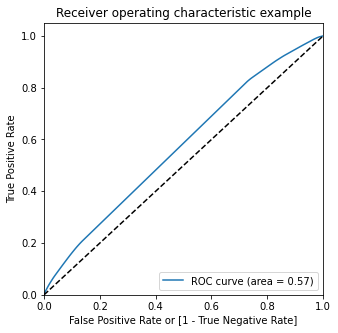

In [48]:
draw_roc(y_train_pred_final.gender, y_train_pred_final.gender_prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [49]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.gender_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,gender,gender_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.645368,0,1,1,1,1,1,1,1,1,0,0,0
1,1,0.645368,1,1,1,1,1,1,1,1,1,0,0,0
2,1,0.645368,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.645368,3,1,1,1,1,1,1,1,1,0,0,0
4,1,0.645368,4,1,1,1,1,1,1,1,1,0,0,0


In [50]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.635839     1.000000     0.000000
0.1   0.1  0.635839     1.000000     0.000000
0.2   0.2  0.635839     1.000000     0.000000
0.3   0.3  0.636667     0.999043     0.003945
0.4   0.4  0.639005     0.994485     0.018322
0.5   0.5  0.639711     0.987094     0.033166
0.6   0.6  0.625003     0.832989     0.261852
0.7   0.7  0.432099     0.165479     0.897626
0.8   0.8  0.371588     0.014859     0.994450
0.9   0.9  0.364161     0.000000     1.000000


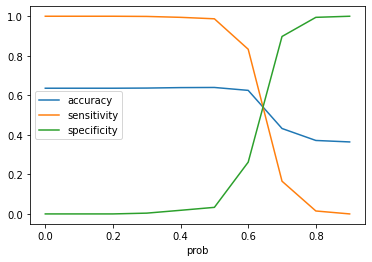

In [51]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

#### From the curve above, 0.615 is the optimum point to take it as a cutoff probability.

In [58]:
y_train_pred_final['final_predicted'] = y_train_pred_final.gender_prob.map( lambda x: 1 if x > 0.65 else 0)

y_train_pred_final.head()

,gender,gender_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,target0,final_predicted
0,1,0.645368,0,1,1,1,1,1,1,1,1,0,0,0,0,0
1,1,0.645368,1,1,1,1,1,1,1,1,1,0,0,0,0,0
2,1,0.645368,2,1,1,1,1,1,1,1,1,0,0,0,0,0
3,1,0.645368,3,1,1,1,1,1,1,1,1,0,0,0,0,0
4,1,0.645368,4,1,1,1,1,1,1,1,1,0,0,0,0,0


In [59]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.final_predicted )
confusion2

array([[12908,  2047],
       [20690,  5422]])

In [60]:
resultsbasedOnConfusionMatrix(confusion2,y_train_pred_final.gender, y_train_pred_final.final_predicted)

Accuracy: 44.63%
True Positive: 5422
True Negative: 12908
False Positive: 2047
False Negative: 20690
Sensitivity: 20.76%
Specificity: 86.31%
Male predictive value: 72.59%
Female predictive value: 38.42%
Precision: 72.59%
Recall: 20.76%
F1 Score: 32.29%


### Precision and recall tradeoff

In [61]:
from sklearn.metrics import precision_recall_curve

In [62]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.gender, y_train_pred_final.gender_prob)

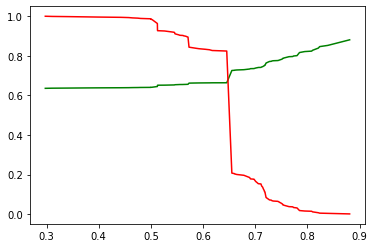

In [63]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [64]:
y_train_pred_final

,gender,gender_prob,index,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,target0,final_predicted
0,1,0.645368,0,1,1,1,1,1,1,1,1,0,0,0,0,0
1,1,0.645368,1,1,1,1,1,1,1,1,1,0,0,0,0,0
2,1,0.645368,2,1,1,1,1,1,1,1,1,0,0,0,0,0
3,1,0.645368,3,1,1,1,1,1,1,1,1,0,0,0,0,0
4,1,0.645368,4,1,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41062,1,0.571122,50693,1,1,1,1,1,1,1,0,0,0,0,0,0
41063,1,0.880952,50694,1,1,1,1,1,1,1,1,1,1,0,0,1
41064,1,0.339806,50695,0,1,1,1,1,0,0,0,0,0,0,0,0
41065,1,0.645368,50696,1,1,1,1,1,1,1,1,0,0,0,0,0


## Test data

In [65]:
X_test = X_test[col]
X_test.head()

,brand_Meizu,brand_OPPO,brand_vivo,model_45rggt2,model_8720L,model_900tr2123,model_A320t,model_A788t,model_A850,model_B199,...,model_å°ç±³4C,model_è£è€€3Cç•…çŽ©ç‰ˆ,model_è£è€€7,model_è£è€€ç•…çŽ©5,model_è¶…çº§æ‰‹æœº1 Pro,model_é’æ˜¥ç‰ˆ,model_é­…è“,model_é­…è“2,model_é»„é‡‘æ–—å£«A8,model_é”‹å°š
12773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12777,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_test_sm = sm.add_constant(X_test)

In [67]:
y_test_pred = res.predict(X_test_sm)

In [68]:
y_test_pred[:10]

12773    0.645368
12774    0.526316
12775    0.645368
12776    0.718788
12777    0.545455
12778    0.645368
12779    0.645368
12780    0.512821
12781    0.645368
12782    0.645368
dtype: float64

In [69]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [70]:
# Let's see the head
y_pred_1.head()

,0
12773,0.645368
12774,0.526316
12775,0.645368
12776,0.718788
12777,0.545455


In [71]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [72]:
# Putting id to index
y_test_df['id'] = y_test_df.index

In [73]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [74]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [75]:
y_pred_final.head()

,gender,id,0
0,0,12773,0.645368
1,1,12774,0.526316
2,0,12775,0.645368
3,1,12776,0.718788
4,1,12777,0.545455


In [76]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'gender_prob'})

In [77]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['id','gender','gender_prob'], axis=1)

In [78]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,gender,gender_prob
0,12773,0,0.645368
1,12774,1,0.526316
2,12775,0,0.645368
3,12776,1,0.718788
4,12777,1,0.545455


In [79]:
y_pred_final['final_predicted'] = y_pred_final.gender_prob.map(lambda x: 1 if x > 0.65 else 0)

In [80]:
y_pred_final.head()

,id,gender,gender_prob,final_predicted
0,12773,0,0.645368,0
1,12774,1,0.526316,0
2,12775,0,0.645368,0
3,12776,1,0.718788,1
4,12777,1,0.545455,0


In [81]:
confusion_test = metrics.confusion_matrix(y_pred_final.gender, y_pred_final.final_predicted )
confusion_test

array([[3211,  527],
       [5164, 1366]])

In [82]:
resultsbasedOnConfusionMatrix(confusion_test,y_pred_final.gender, y_pred_final.final_predicted)

Accuracy: 44.58%
True Positive: 1366
True Negative: 3211
False Positive: 527
False Negative: 5164
Sensitivity: 20.92%
Specificity: 85.90%
Male predictive value: 72.16%
Female predictive value: 38.34%
Precision: 72.16%
Recall: 20.92%
F1 Score: 32.43%


##### With simple logistice regression model we got the male prediction value of ~72% and female prediction value of ~38% with an accuracy of ~45%

##### We will try to increase the model performance using XGboost

## XGBoost classification 

In [83]:
#Import required libraries
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [84]:
#get X_train, y_train from train_data
X_train = train_data.loc[:, ((train_data.columns != 'device_id') & (train_data.columns != 'age') \
                             & (train_data.columns != 'gender'))]
y_train = train_data.loc[:, (train_data.columns == 'gender')]

In [85]:
#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'age') \
                             & (test_data.columns != 'gender'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

In [86]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5],
        'n_estimators': range(60, 360, 40),
        'learning_rate': [0.1, 0.01, 0.05]
 }

In [87]:
# A parameter grid for XGBoost
params1 = {
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4],
        'n_estimators': range(60, 140, 40),
        'learning_rate': [0.1, 0.01]
 }

In [88]:
estimator = XGBClassifier(objective= 'binary:logistic',eval_metric='logloss', seed=42)

In [89]:
clf = GridSearchCV(estimator=estimator, 
                   param_grid=params1,
                   scoring='roc_auc', 
                   n_jobs = 1 ,
                   verbose=50000)

In [90]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV 1/5; 1/192] START colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6
[CV 1/5; 1/192] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6;, score=0.572 total time=   1.0s
[CV 2/5; 1/192] START colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6
[CV 2/5; 1/192] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6;, score=0.578 total time=   1.0s
[CV 3/5; 1/192] START colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6
[CV 3/5; 1/192] END colsample_bytree=0.6, gamma=0.5, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=60, subsample=0.6;, score=0.559 total time=   1.0s
[CV 4/5; 1/192] 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                               

In [91]:
print("Best parameters:", clf.best_params_)
print("Highest ROC: ", clf.best_score_)

Best parameters: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Highest ROC:  0.5718697765055112


In [92]:
# A parameter grid for XGBoost
params2 = {
        'min_child_weight': [10],
        'gamma': [ 2, 5],
        'subsample': [ 1.0],
        'colsample_bytree': [ 1.0],
        'max_depth': [ 5],
        'n_estimators': range(140, 360, 40),
        'learning_rate': [ 0.05]
 }

In [93]:
clf2 = GridSearchCV(estimator=estimator, 
                   param_grid=params2,
                   scoring='roc_auc', 
                   n_jobs = 1 ,
                   verbose=50000)

In [94]:
clf2.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0
[CV 1/5; 1/12] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0;, score=0.571 total time=   3.3s
[CV 2/5; 1/12] START colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0
[CV 2/5; 1/12] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0;, score=0.578 total time=   3.3s
[CV 3/5; 1/12] START colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0
[CV 3/5; 1/12] END colsample_bytree=1.0, gamma=2, learning_rate=0.05, max_depth=5, min_child_weight=10, n_estimators=140, subsample=1.0;, score=0.562 total time=   3.4s
[CV 4/5; 1/12] STA

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                               

In [95]:
print("Best parameters:", clf2.best_params_)
print("Highest ROC: ", clf2.best_score_)

Best parameters: {'colsample_bytree': 1.0, 'gamma': 2, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 140, 'subsample': 1.0}
Highest ROC:  0.5701607835010843


Let's combine best parameters from both and get the best paramaters.

In [96]:
# A parameter grid for XGBoost
params3 = {
        'min_child_weight': [1,10],
        'gamma': [1, 2],
        'subsample': [ 0.8,1.0],
        'colsample_bytree': [ 0.6, 1.0],
        'max_depth': [4, 5],
        'n_estimators': [100, 140],
        'learning_rate': [0.1, 0.05]
 }

In [97]:
clf3 = GridSearchCV(estimator=estimator, 
                   param_grid=params3,
                   scoring='roc_auc', 
                   n_jobs = 1 ,
                   verbose=50000)

In [98]:
clf3.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5; 1/128] START colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8
[CV 1/5; 1/128] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.573 total time=   1.7s
[CV 2/5; 1/128] START colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8
[CV 2/5; 1/128] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.581 total time=   1.7s
[CV 3/5; 1/128] START colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8
[CV 3/5; 1/128] END colsample_bytree=0.6, gamma=1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8;, score=0.562 total time=   1.8s
[CV 4/5; 1/128] START 

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     seed=42, subsample=None, tree_method=None,
                               

In [99]:
print("Best parameters:", clf3.best_params_)
print("Highest ROC: ", clf3.best_score_)

Best parameters: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 10, 'n_estimators': 100, 'subsample': 0.8}
Highest ROC:  0.5720301525099585


Based on the 3 params, for third param we got highest ROC.So, we will build and test the model based on it.

In [100]:
xgb = XGBClassifier(n_estimators=100,subsample=0.8,min_child_weight=10,\
                          max_depth=4,learning_rate=0.1,gamma=1,colsample_bytree=0.6,\
                          objective= 'binary:logistic',eval_metric='logloss', seed=42)

In [101]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='logloss', gamma=1,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              predictor='auto', random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=42, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [102]:
# make predictions for test data
predictions = xgb.predict(X_test)

In [103]:
predictions = [round(value) for value in predictions]

In [104]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)

[[  83 3655]
 [  59 6471]]


In [105]:
resultsbasedOnConfusionMatrix(confusion,y_test, predictions)

Accuracy: 63.83%
True Positive: 6471
True Negative: 83
False Positive: 3655
False Negative: 59
Sensitivity: 99.10%
Specificity: 2.22%
Male predictive value: 63.90%
Female predictive value: 58.45%
Precision: 63.90%
Recall: 99.10%
F1 Score: 77.70%


In logistic regression we got a male prediction score of 72% and female prediction score of 38%. With xgboost we gor male prediction rate as 64% and female prediction rate as 58%.

Even though male prediction score is reduced by a small ammount, female prediction score is increased drastically. And accuracy and f1 score is also increased. So, out of these two. I prefer xgboost.

## Stacking Model

In [106]:
#get X_train, y_train from train_data
X_train = train_data.loc[:, ((train_data.columns != 'device_id') & (train_data.columns != 'age') \
                             & (train_data.columns != 'gender'))]
y_train = train_data.loc[:, (train_data.columns == 'gender')]

#get X_test, y_test from test_data
X_test = test_data.loc[:, ((test_data.columns != 'device_id') & (test_data.columns != 'age') \
                             & (test_data.columns != 'gender'))]
y_test = test_data.loc[:, (test_data.columns == 'gender')]

Let's find the best parameters for random forest

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [108]:
rfc=RandomForestClassifier(random_state=42)

In [109]:
param_grid = { 
    'n_estimators': [60,100,140,180,220],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [110]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring='roc_auc', cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [60, 100, 140, 180, 220]},
             scoring='roc_auc')

In [111]:
print("Best parameters:", CV_rfc.best_params_)
print("Highest ROC: ", CV_rfc.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'n_estimators': 180}
Highest ROC:  0.5694902407127662


In [116]:
#Build random forest model with best parameters
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 180, max_depth=7, criterion='entropy')

In [117]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=180,
                       random_state=42)

In [118]:
pred=rfc1.predict(X_test)

In [119]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, pred)
print(confusion)

[[   9 3729]
 [   3 6527]]


In [120]:
resultsbasedOnConfusionMatrix(confusion,y_test, pred)

Accuracy: 63.65%
True Positive: 6527
True Negative: 9
False Positive: 3729
False Negative: 3
Sensitivity: 99.95%
Specificity: 0.24%
Male predictive value: 63.64%
Female predictive value: 75.00%
Precision: 63.64%
Recall: 99.95%
F1 Score: 77.77%


In [121]:
from sklearn import preprocessing
from mlxtend.classifier import StackingCVClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn import model_selection
from xgboost import XGBClassifier

In [122]:
# x,y to np 
X_train_np = X_train.values
y_train_np = y_train.values

In [123]:
clf1 = LogisticRegression()
stacking_demo = StackingCVClassifier(classifiers=[clf1, rfc1], meta_classifier=xgb, use_probas=True, cv=3)

In [124]:
for clf, label in zip([clf1, rfc1, xgb], 
                      ['lr', 
                       'Random Forest', 
                       'xgb']):

    scores = model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.57 (+/- 0.00) [lr]
Accuracy: 0.57 (+/- 0.00) [Random Forest]
Accuracy: 0.57 (+/- 0.00) [xgb]


In [125]:
# Fit on train data 
sclf_fit = stacking_demo.fit(X_train_np, y_train_np.reshape(-1))

In [126]:
train_pred = sclf_fit.predict_proba(X_train)

In [127]:
# Probabilities for classes male,female
zeros = [i[0] for i in train_pred]
ones  = [i[1] for i in train_pred]

In [128]:
train_predictions = ones

In [129]:
# Converting train_predictions to a dataframe which is an array
y_train_pred = pd.DataFrame(train_predictions)

In [130]:
# Let's see the head
y_train_pred.head()

,0
0,0.652028
1,0.689475
2,0.673010
3,0.599758
4,0.652028


In [131]:
# Putting id to index
y_train['id'] = y_train.index

# Removing index for both dataframes to append them side by side 
y_train_pred.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [132]:
# Appending y_test_df and y_pred
y_train_pred_final = pd.concat([y_train, y_train_pred],axis=1)

In [133]:
y_train_pred_final.head()

,gender,id,0
0,1,0,0.652028
1,1,1,0.689475
2,1,2,0.673010
3,1,3,0.599758
4,1,4,0.652028


In [134]:
# Renaming the column 
y_train_pred_final= y_train_pred_final.rename(columns={ 0 : 'gender_prob'})

# Rearranging the columns
y_train_pred_final = y_train_pred_final.reindex(['id','gender','gender_prob'], axis=1)

# Let's see the head of y_train_pred_final
y_train_pred_final.head()

,id,gender,gender_prob
0,0,1,0.652028
1,1,1,0.689475
2,2,1,0.673010
3,3,1,0.599758
4,4,1,0.652028


In [135]:
y_train_pred_final['predicted'] = y_train_pred_final.gender_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,id,gender,gender_prob,predicted
0,0,1,0.652028,1
1,1,1,0.689475,1
2,2,1,0.673010,1
3,3,1,0.599758,1
4,4,1,0.652028,1


In [136]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.predicted)
print(confusion)

[[  400 14555]
 [  258 25854]]


In [137]:
resultsbasedOnConfusionMatrix(confusion,y_train_pred_final.gender, y_train_pred_final.predicted)

Accuracy: 63.93%
True Positive: 25854
True Negative: 400
False Positive: 14555
False Negative: 258
Sensitivity: 99.01%
Specificity: 2.67%
Male predictive value: 63.98%
Female predictive value: 60.79%
Precision: 63.98%
Recall: 99.01%
F1 Score: 77.73%


In [138]:
def ks(data=None,target=None, prob=None):
    temp_data = data
    temp_data['target0'] = 1 - temp_data[target]
    temp_data['bucket'] = pd.qcut(temp_data[prob], 6)
    grouped = temp_data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob].apply('{:.4f}'.format)
    kstable['max_prob'] = grouped.max()[prob]
    kstable['males']   = grouped.sum()[target]
    kstable['females'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['male_rate'] = (kstable.males / temp_data[target].sum()).apply('{0:.2%}'.format)
    kstable['female_rate'] = (kstable.females / temp_data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_malerate']=(kstable.males / temp_data[target].sum()).cumsum()
    kstable['cum_femalerate']=(kstable.females / temp_data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_malerate']-kstable['cum_femalerate'], 3) * 100

    #Formating
    kstable['cum_malerate']= kstable['cum_malerate'].apply('{0:.2%}'.format)
    kstable['cum_femalerate']= kstable['cum_femalerate'].apply('{0:.2%}'.format)
    kstable.index = range(1,7)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', None)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [139]:
y_train_pred_final.gender = y_train_pred_final.gender.astype("int")

ks_table = ks(data=y_train_pred_final,target="gender", prob="gender_prob")

ks_table

KS is 10.4% at decile 3


,min_prob,max_prob,males,females,male_rate,female_rate,cum_malerate,cum_femalerate,KS
Decile,,,,,,,,,
1,0.6895,0.851115,4708,1818,18.03%,12.16%,18.03%,12.16%,5.9
2,0.6730,0.689112,4040,1859,15.47%,12.43%,33.50%,24.59%,8.9
3,0.6530,0.672454,4865,2568,18.63%,17.17%,52.13%,41.76%,10.4
4,0.6384,0.652767,4758,2721,18.22%,18.19%,70.35%,59.95%,10.4
5,0.5800,0.637510,4170,2711,15.97%,18.13%,86.32%,78.08%,8.2
6,0.2639,0.579370,3571,3278,13.68%,21.92%,100.00%,100.00%,0.0


The probability range is from 0.6384 to 0.6724 is having the highist KS. let us see the graphs to decide the cutoff.

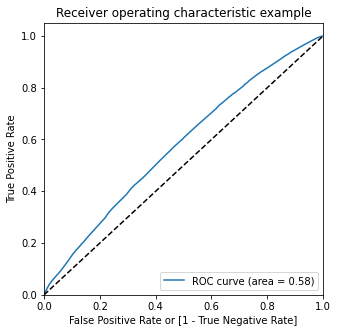

In [140]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.gender, y_train_pred_final.gender_prob,\
                                         drop_intermediate = False )

draw_roc(y_train_pred_final.gender, y_train_pred_final.gender_prob)

In [141]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.gender_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,id,gender,gender_prob,predicted,target0,bucket,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1,0.652028,1,0,"(0.638, 0.653]",1,1,1,1,1,1,1,0,0,0
1,1,1,0.689475,1,0,"(0.689, 0.851]",1,1,1,1,1,1,1,0,0,0
2,2,1,0.673010,1,0,"(0.672, 0.689]",1,1,1,1,1,1,1,0,0,0
3,3,1,0.599758,1,0,"(0.579, 0.638]",1,1,1,1,1,1,0,0,0,0
4,4,1,0.652028,1,0,"(0.638, 0.653]",1,1,1,1,1,1,1,0,0,0


In [142]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.635839     1.000000     0.000000
0.1   0.1  0.635839     1.000000     0.000000
0.2   0.2  0.635839     1.000000     0.000000
0.3   0.3  0.637324     0.997779     0.007957
0.4   0.4  0.637519     0.996132     0.011367
0.5   0.5  0.639297     0.990119     0.026747
0.6   0.6  0.611659     0.780982     0.316015
0.7   0.7  0.423625     0.149357     0.902508
0.8   0.8  0.366377     0.004213     0.998730
0.9   0.9  0.364161     0.000000     1.000000


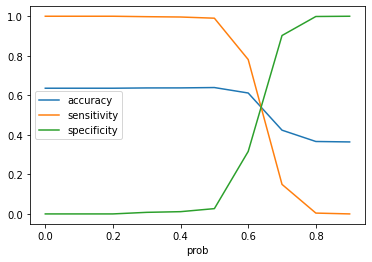

In [143]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

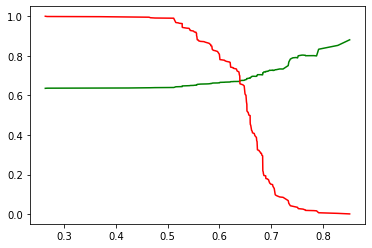

In [144]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.gender, y_train_pred_final.gender_prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [145]:
y_train_pred_final['predicted'] = y_train_pred_final.gender_prob.map(lambda x: 1 if x > 0.6 else 0)

y_train_pred_final.head()

,id,gender,gender_prob,predicted,target0,bucket,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,1,0.652028,1,0,"(0.638, 0.653]",1,1,1,1,1,1,1,0,0,0
1,1,1,0.689475,1,0,"(0.689, 0.851]",1,1,1,1,1,1,1,0,0,0
2,2,1,0.673010,1,0,"(0.672, 0.689]",1,1,1,1,1,1,1,0,0,0
3,3,1,0.599758,0,0,"(0.579, 0.638]",1,1,1,1,1,1,0,0,0,0
4,4,1,0.652028,1,0,"(0.638, 0.653]",1,1,1,1,1,1,1,0,0,0


In [146]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.gender, y_train_pred_final.predicted)
print(confusion)

[[ 4726 10229]
 [ 5719 20393]]


In [147]:
resultsbasedOnConfusionMatrix(confusion,y_train_pred_final.gender, y_train_pred_final.predicted)

Accuracy: 61.17%
True Positive: 20393
True Negative: 4726
False Positive: 10229
False Negative: 5719
Sensitivity: 78.10%
Specificity: 31.60%
Male predictive value: 66.60%
Female predictive value: 45.25%
Precision: 66.60%
Recall: 78.10%
F1 Score: 71.89%


In [148]:
test_pred = sclf_fit.predict_proba(X_test)

# Probabilities for classes male,female
zeros = [i[0] for i in test_pred]
ones  = [i[1] for i in test_pred]

In [149]:
# Converting y_pred to a dataframe which is an array
y_pred = pd.DataFrame(ones)

In [150]:
# Let's see the head
y_pred.head()

,0
0,0.599758
1,0.549799
2,0.610143
3,0.705609
4,0.555698


In [151]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting id to index
y_test_df['id'] = y_test_df.index

In [152]:
# Removing index for both dataframes to append them side by side 
y_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [153]:
# Appending y_test_df and y_pred
y_pred_final = pd.concat([y_test_df, y_pred],axis=1)

In [154]:
y_pred_final.head()

,gender,id,0
0,0,12773,0.599758
1,1,12774,0.549799
2,0,12775,0.610143
3,1,12776,0.705609
4,1,12777,0.555698


In [155]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'gender_prob'})

In [156]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['id','gender','gender_prob'], axis=1)

In [157]:
# Let's see the head of y_pred_final
y_pred_final.head()

,id,gender,gender_prob
0,12773,0,0.599758
1,12774,1,0.549799
2,12775,0,0.610143
3,12776,1,0.705609
4,12777,1,0.555698


In [158]:
y_pred_final['final_predicted'] = y_pred_final.gender_prob.map(lambda x: 1 if x > 0.6 else 0)

In [159]:
y_pred_final.head()

,id,gender,gender_prob,final_predicted
0,12773,0,0.599758,0
1,12774,1,0.549799,0
2,12775,0,0.610143,1
3,12776,1,0.705609,1
4,12777,1,0.555698,0


In [160]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred_final.gender, y_pred_final.final_predicted)
print(confusion)

[[1207 2531]
 [1431 5099]]


In [161]:
resultsbasedOnConfusionMatrix(confusion,y_pred_final.gender, y_pred_final.final_predicted)

Accuracy: 61.41%
True Positive: 5099
True Negative: 1207
False Positive: 2531
False Negative: 1431
Sensitivity: 78.09%
Specificity: 32.29%
Male predictive value: 66.83%
Female predictive value: 45.75%
Precision: 66.83%
Recall: 78.09%
F1 Score: 72.02%


I stacking, we have got ~67% male predictive rate and ~46% female predictive rate.

The Accuracy is also ~61% with F1 score of ~72%